# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [178]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [179]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [180]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}lat={lats}&lon={lngs}&appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | kidal
Processing Record 4 of Set 1 | gadzhiyevo
Processing Record 5 of Set 1 | cockburn town
Processing Record 6 of Set 1 | ballina
Processing Record 7 of Set 1 | nadi
Processing Record 8 of Set 1 | kaa-khem
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | boyolangu
Processing Record 12 of Set 1 | basco
Processing Record 13 of Set 1 | hami
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | olgii
City not found. Skipping...
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | mocimboa
Processing Record 18 of Set 1 | san angelo
Processing Record 19 of Set 1 | flagstaff
Processing Record 20 of Set 1 | chonchi
Processing Record 21 of Set 1 | akureyri
Processing Record 22 of Set 1 | isafjor

In [181]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [182]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,3.54,72,10,15.88,TF,1718010873
1,grytviken,-54.2811,-36.5092,-7.11,76,20,4.11,GS,1718010873
2,kidal,18.4411,1.4078,39.57,14,38,5.34,ML,1718010873
3,gadzhiyevo,69.2551,33.3362,10.91,72,80,5.72,RU,1718010873
4,cockburn town,21.4612,-71.1419,27.44,87,100,8.95,TC,1718010873


In [183]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [184]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.54,72,10,15.88,TF,1718010873
1,grytviken,-54.2811,-36.5092,-7.11,76,20,4.11,GS,1718010873
2,kidal,18.4411,1.4078,39.57,14,38,5.34,ML,1718010873
3,gadzhiyevo,69.2551,33.3362,10.91,72,80,5.72,RU,1718010873
4,cockburn town,21.4612,-71.1419,27.44,87,100,8.95,TC,1718010873


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

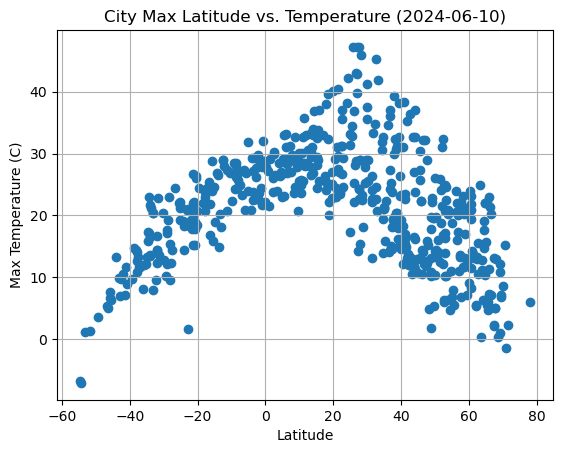

In [185]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2024-06-10)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

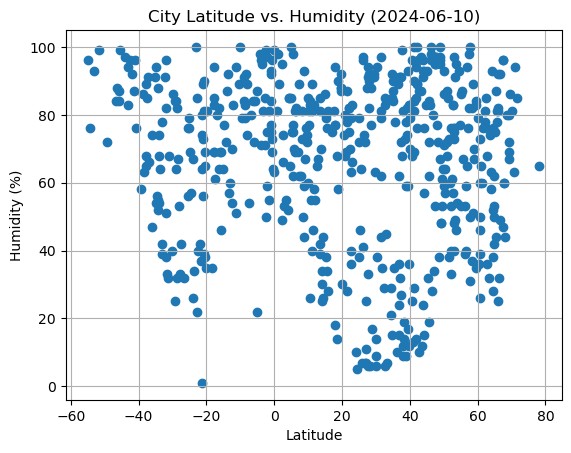

In [186]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values_2 = city_data_df['Humidity']
plt.scatter(x_values,y_values_2)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-06-10)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

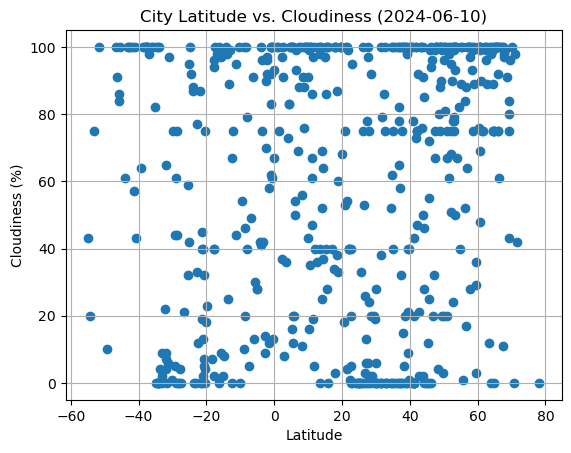

In [187]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values_3 = city_data_df['Cloudiness']
plt.scatter(x_values,y_values_3)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-06-10)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

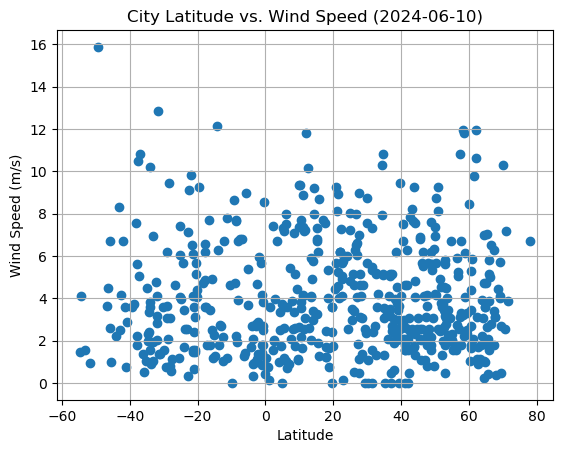

In [188]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values_4 = city_data_df['Wind Speed']
plt.scatter(x_values,y_values_4)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-06-10)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [189]:
# Define a function to create Linear Regression plots


In [190]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kidal,18.4411,1.4078,39.57,14,38,5.34,ML,1718010873
3,gadzhiyevo,69.2551,33.3362,10.91,72,80,5.72,RU,1718010873
4,cockburn town,21.4612,-71.1419,27.44,87,100,8.95,TC,1718010873
7,kaa-khem,51.6833,94.7333,24.11,38,61,4.52,RU,1718010873
11,basco,20.4487,121.9702,29.14,74,18,4.45,PH,1718010873


In [191]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,3.54,72,10,15.88,TF,1718010873
1,grytviken,-54.2811,-36.5092,-7.11,76,20,4.11,GS,1718010873
5,ballina,-28.8667,153.5667,12.10,64,0,6.18,AU,1718010873
6,nadi,-17.8000,177.4167,24.00,69,40,3.60,FJ,1718010873
8,adamstown,-25.0660,-130.1015,22.24,79,42,6.05,PN,1718010873


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4279556490845086


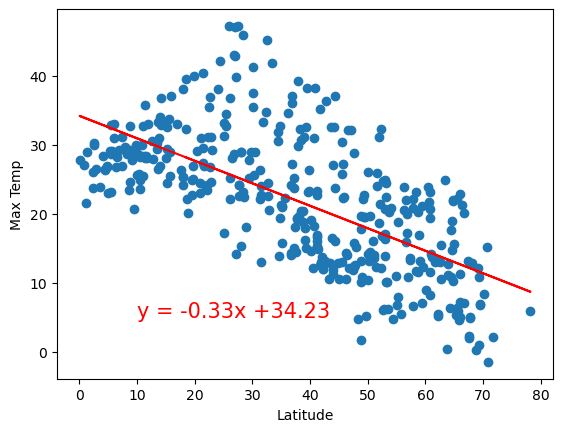

In [192]:
# Linear regression on Northern Hemisphere
x_values_nor = northern_hemi_df["Lat"]
y_values_temp = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_nor, y_values_temp)
regress_values_1 = x_values_nor * slope + intercept

line_eq_1 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_nor,y_values_temp)
plt.plot(x_values_nor,regress_values_1,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_1,(10,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.7080042840638765


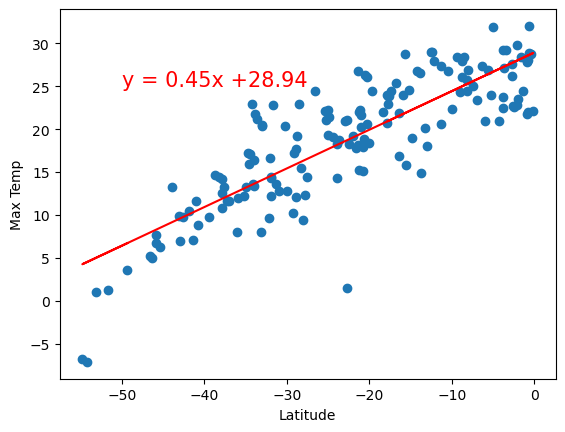

In [193]:
# Linear regression on Southern Hemisphere
x_values_sou = southern_hemi_df["Lat"]
y_values_temp_2 = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_sou, y_values_temp_2)
regress_values_2 = x_values_sou * slope + intercept

line_eq_2 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_sou,y_values_temp_2)
plt.plot(x_values_sou,regress_values_2,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq_2,(-50,25),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The closer to the equator, the higher the temperature of the city.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 8.046383139713704e-05


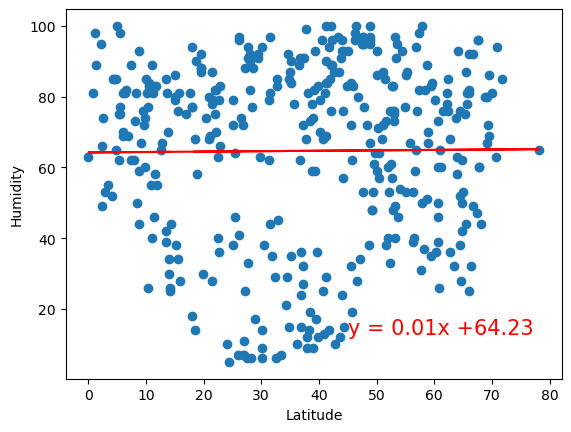

In [194]:
# Northern Hemisphere
y_values_hum = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_nor, y_values_hum)
regress_values_3 = x_values_nor * slope + intercept

line_eq_3 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_nor,y_values_hum)
plt.plot(x_values_nor,regress_values_3,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_3,(45,13),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0014032045581807385


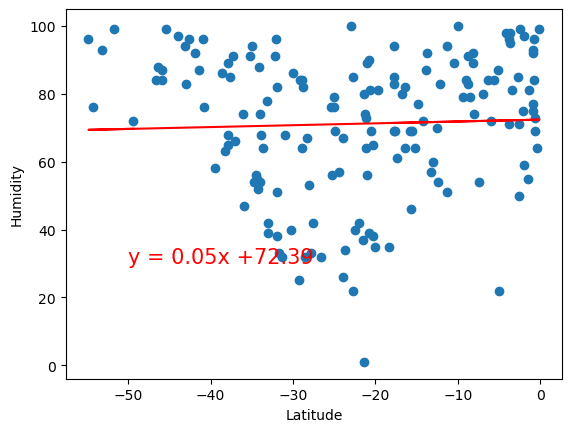

In [195]:
# Southern Hemisphere
y_values_hum_2 = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_sou, y_values_hum_2)
regress_values_4 = x_values_sou * slope + intercept

line_eq_4 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_sou,y_values_hum_2)
plt.plot(x_values_sou,regress_values_4,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq_4,(-50,30),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Humidity has little correlation with Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02050821534588769


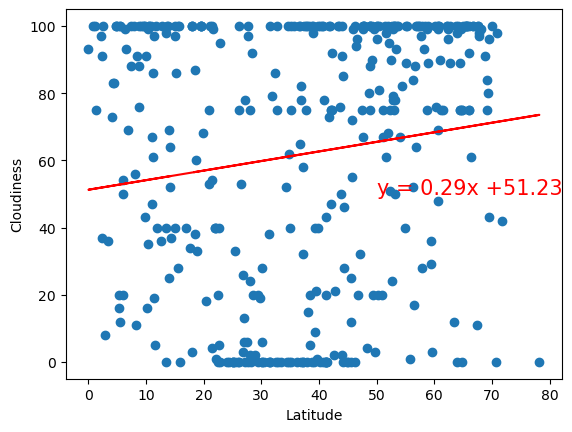

In [196]:
# Northern Hemisphere
y_values_cloud_nor = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_nor, y_values_cloud_nor)
regress_values_5 = x_values_nor * slope + intercept

line_eq_5 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_nor,y_values_cloud_nor)
plt.plot(x_values_nor,regress_values_5,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_5,(50,50),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.000267425693514929


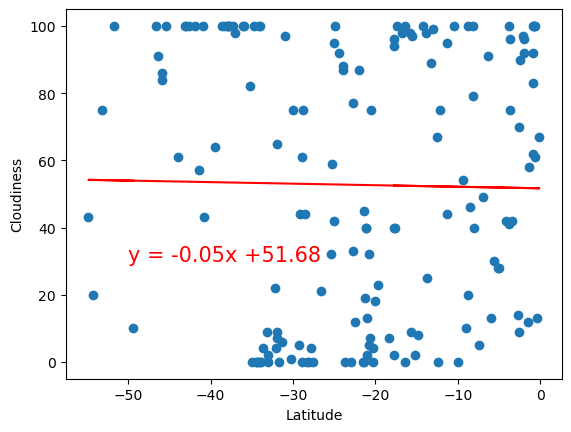

In [197]:
# Southern Hemisphere
y_values_cloud_sou = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_sou, y_values_cloud_sou)
regress_values_6 = x_values_sou * slope + intercept

line_eq_6 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_sou,y_values_cloud_sou)
plt.plot(x_values_sou,regress_values_6,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq_6,(-50,30),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Cloudiness has little correlation with Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.002269560928197328


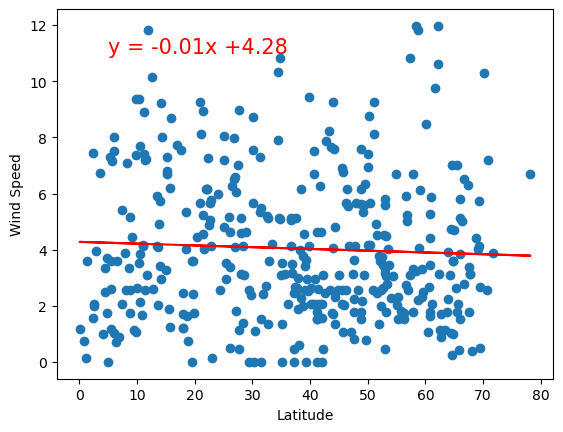

In [199]:
# Northern Hemisphere
y_values_wind_nor = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_nor, y_values_wind_nor)
regress_values_7 = x_values_nor * slope + intercept

line_eq_7 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_nor,y_values_wind_nor)
plt.plot(x_values_nor,regress_values_7,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_7,(5,11),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.00506711594266823


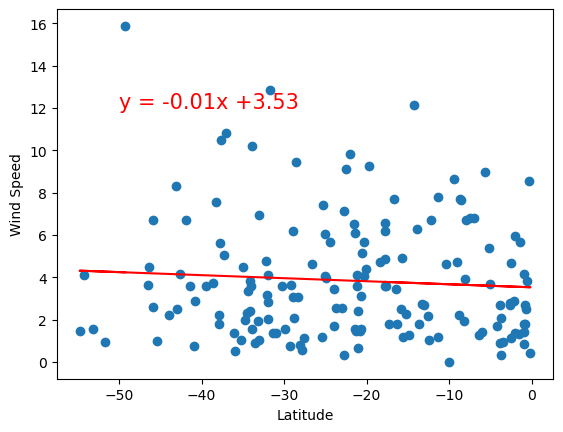

In [200]:
# Southern Hemisphere
y_values_wind_sou = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_sou, y_values_wind_sou)
regress_values_8 = x_values_sou * slope + intercept

line_eq_8 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_sou,y_values_wind_sou)
plt.plot(x_values_sou,regress_values_8,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq_8,(-50,12),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Wind Speed has little correlation with Latitude.